<a href="https://colab.research.google.com/github/cassie1508/DNA-Sequence-Matching/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  #Visualization library to create more advance visualizations

In [ ]:
df = pd.read_csv("churn.csv")

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
sns.set_style(style = "whitegrid")
plt.figure(figsize=(12,10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Churn')

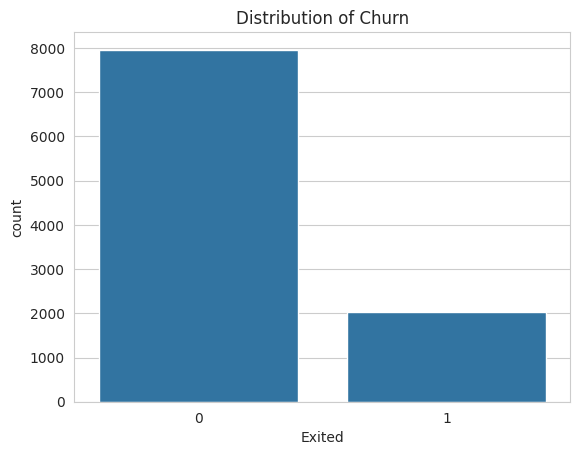

In [ ]:
# Plot the distribution between data to understand
sns.countplot(x="Exited", data=df)
plt.title("Distribution of Churn")
# Show imbalance to consider -> use technique oversampling or undersampling

Text(0.5, 1.0, 'Age Distribution')

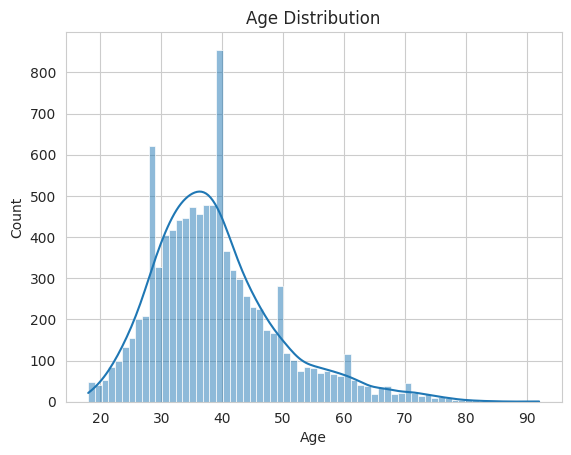

In [ ]:
# Plot age distribution
sns.histplot(data=df, x="Age", kde = True) #kde: kernel density estimate
plt.title("Age Distribution")

Text(0.5, 1.0, 'Credit Score vs Age')

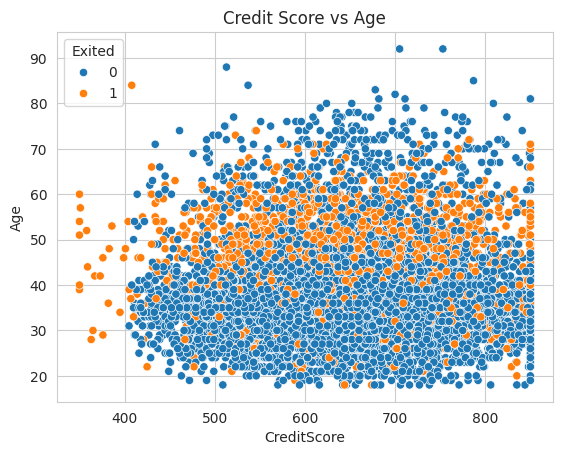

In [ ]:
# Scatter plot of the customers vs age
sns.scatterplot(data=df, x="CreditScore", y="Age", hue="Exited")
plt.title("Credit Score vs Age")

Text(0.5, 1.0, 'Account Balance vs Churn')

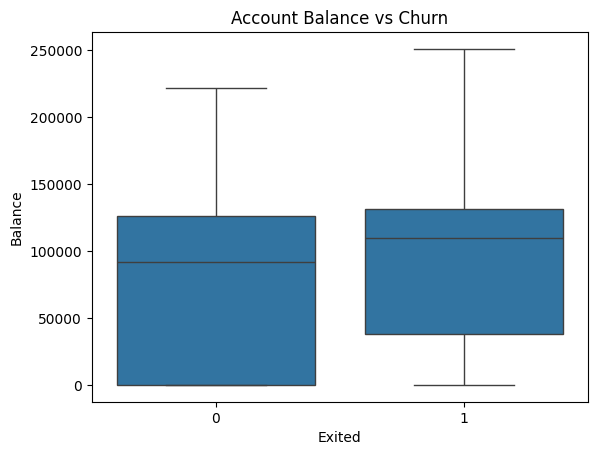

In [ ]:
# Box plot of account balance vs people who churn and didn't churn
sns.boxplot(x="Exited", y="Balance", data=df)
plt.title("Account Balance vs Churn")
# -> People who churn has higher account balance

Text(0.5, 1.0, 'Credit score vs churn')

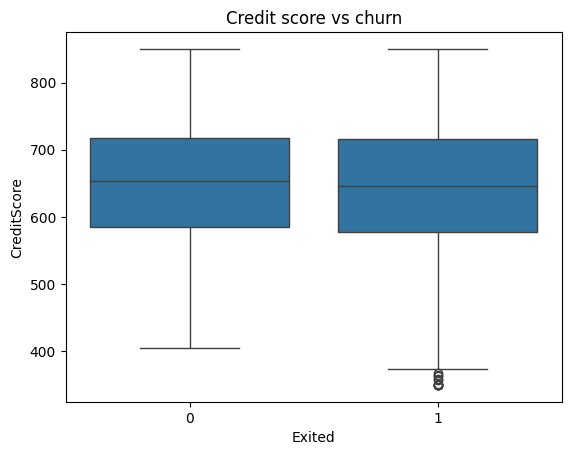

In [ ]:
# Box plot comparing credit score vs churn
# x,y is the column on dataset
sns.boxplot(x="Exited", y="CreditScore", data=df)
plt.title("Credit score vs churn")

In [ ]:
# Takes only 1-2 arguments
features = df.drop(["RowNumber", "Surname", "CustomerId"], axis=1)  #exclude the exit column

In [ ]:
# Feature engineering
features["CLV"] = df["Balance"] * df["EstimatedSalary"] / 100000      #Customer lifetime value categorizing into groups
features["AgeGroup"] = pd.cut(df["Age"], bins=[0,30,45,60,100], labels=["Young", "MiddleAged", "Senior", "Elderly"])
features["BalanceLevel"] = pd.cut(df["Balance"], bins=[-1, 50000, 150000, df["Balance"].max()], labels=["Low", "Medium", "High"])
features["CreditScoreRange"] = pd.cut(df["CreditScore"], bins=[0,580,670,740,850], labels=["Poor", "Fair", "Good", "Excellent"])
features["TenureGroup"] = pd.cut(df["Tenure"], bins=[-1, 3, 6, 10], labels=["New", "Midterm", "Longterm"])
features["ProductCategory"] = pd.cut(df["NumOfProducts"], bins=[0, 1, 2, df["NumOfProducts"].max()], labels=["Single", "Double", "Multiple"])

features["BalanceRatio"] = df["Balance"] / df["EstimatedSalary"]
features["CreditScoreRatio"] = df["CreditScore"] / df["EstimatedSalary"]
features["CreditScoreToAgeRatio"] = df["CreditScore"] / df["Age"]
features["TenureAgeRatio"] = df["Tenure"] / df["Age"]
features["AvgTenurePerProduct"] = df["Tenure"] / df["NumOfProducts"]
features["SalaryToCreditScoreRatio"] = df["EstimatedSalary"] / df["CreditScore"]
features["SalaryToAgeRatio"] = df["EstimatedSalary"] / df["Age"]
features["IsZeroBalance"] = (df["Balance"] == 0).astype(int)
features["AgeBalanceInteraction"] = df["Age"] * df["Balance"]
features["ActiveTenureRatio"] = df["IsActiveMember"] * df["Tenure"] / df["Age"]
features["TenureWeight"] = 1 / (1 + df["Tenure"])


In [ ]:
features

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,CreditScoreRatio,CreditScoreToAgeRatio,TenureAgeRatio,AvgTenurePerProduct,SalaryToCreditScoreRatio,SalaryToAgeRatio,IsZeroBalance,AgeBalanceInteraction,ActiveTenureRatio,TenureWeight
0,619,France,Female,42,2,0.00,1,1,1,101348.88,...,0.006108,14.738095,0.047619,2.000000,163.730016,2413.068571,1,0.00,0.047619,0.333333
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,...,0.005402,14.829268,0.024390,1.000000,185.102928,2744.940976,0,3436122.26,0.024390,0.500000
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,...,0.004406,11.952381,0.190476,2.666667,226.955319,2712.656429,0,6705753.60,0.000000,0.111111
3,699,France,Female,39,1,0.00,2,0,0,93826.63,...,0.007450,17.923077,0.025641,0.500000,134.229800,2405.811026,1,0.00,0.000000,0.500000
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,...,0.010748,19.767442,0.046512,2.000000,93.040118,1839.165116,0,5396965.26,0.046512,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,...,0.008009,19.769231,0.128205,2.500000,124.864643,2468.477949,1,0.00,0.000000,0.166667
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,...,0.005074,14.742857,0.285714,10.000000,197.092578,2905.707714,0,2007936.35,0.285714,0.090909
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,...,0.016847,19.694444,0.194444,7.000000,59.359069,1169.043889,1,0.00,0.194444,0.125000
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,...,0.008311,18.380952,0.071429,1.500000,120.321917,2211.631429,0,3153163.02,0.000000,0.250000


In [ ]:
import numpy as np

# Replace inf with nan value
# features.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
# Drop rows that has missing values
features = features.dropna()

In [ ]:
features

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,CreditScoreRatio,CreditScoreToAgeRatio,TenureAgeRatio,AvgTenurePerProduct,SalaryToCreditScoreRatio,SalaryToAgeRatio,IsZeroBalance,AgeBalanceInteraction,ActiveTenureRatio,TenureWeight
0,619,France,Female,42,2,0.00,1,1,1,101348.88,...,0.006108,14.738095,0.047619,2.000000,163.730016,2413.068571,1,0.00,0.047619,0.333333
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,...,0.005402,14.829268,0.024390,1.000000,185.102928,2744.940976,0,3436122.26,0.024390,0.500000
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,...,0.004406,11.952381,0.190476,2.666667,226.955319,2712.656429,0,6705753.60,0.000000,0.111111
3,699,France,Female,39,1,0.00,2,0,0,93826.63,...,0.007450,17.923077,0.025641,0.500000,134.229800,2405.811026,1,0.00,0.000000,0.500000
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,...,0.010748,19.767442,0.046512,2.000000,93.040118,1839.165116,0,5396965.26,0.046512,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,...,0.008009,19.769231,0.128205,2.500000,124.864643,2468.477949,1,0.00,0.000000,0.166667
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,...,0.005074,14.742857,0.285714,10.000000,197.092578,2905.707714,0,2007936.35,0.285714,0.090909
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,...,0.016847,19.694444,0.194444,7.000000,59.359069,1169.043889,1,0.00,0.194444,0.125000
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,...,0.008311,18.380952,0.071429,1.500000,120.321917,2211.631429,0,3153163.02,0.000000,0.250000


In [ ]:
target = features["Exited"]

In [ ]:
target.shape

(10000,)

In [ ]:
# Takes only 1-2 arguments
features = features.drop(["Exited"], axis=1)  #exclude the exit column

In [ ]:
features

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,CreditScoreRatio,CreditScoreToAgeRatio,TenureAgeRatio,AvgTenurePerProduct,SalaryToCreditScoreRatio,SalaryToAgeRatio,IsZeroBalance,AgeBalanceInteraction,ActiveTenureRatio,TenureWeight
0,619,France,Female,42,2,0.00,1,1,1,101348.88,...,0.006108,14.738095,0.047619,2.000000,163.730016,2413.068571,1,0.00,0.047619,0.333333
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,...,0.005402,14.829268,0.024390,1.000000,185.102928,2744.940976,0,3436122.26,0.024390,0.500000
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,...,0.004406,11.952381,0.190476,2.666667,226.955319,2712.656429,0,6705753.60,0.000000,0.111111
3,699,France,Female,39,1,0.00,2,0,0,93826.63,...,0.007450,17.923077,0.025641,0.500000,134.229800,2405.811026,1,0.00,0.000000,0.500000
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,...,0.010748,19.767442,0.046512,2.000000,93.040118,1839.165116,0,5396965.26,0.046512,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,...,0.008009,19.769231,0.128205,2.500000,124.864643,2468.477949,1,0.00,0.000000,0.166667
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,...,0.005074,14.742857,0.285714,10.000000,197.092578,2905.707714,0,2007936.35,0.285714,0.090909
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,...,0.016847,19.694444,0.194444,7.000000,59.359069,1169.043889,1,0.00,0.194444,0.125000
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,...,0.008311,18.380952,0.071429,1.500000,120.321917,2211.631429,0,3153163.02,0.000000,0.250000


In [ ]:
# convert the variables to numerical format using one hot encoding (binary format) because ML requires numerical inputs
features = pd.get_dummies(features, columns=["AgeGroup", "CreditScoreRange", "TenureGroup", "BalanceLevel", "Gender", "Geography", "ProductCategory"])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CLV,BalanceRatio,...,BalanceLevel_Medium,BalanceLevel_High,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,ProductCategory_Single,ProductCategory_Double,ProductCategory_Multiple
0,619,42,2,0.00,1,1,1,101348.88,0.000000,0.000000,...,False,False,True,False,True,False,False,True,False,False
1,608,41,1,83807.86,1,0,1,112542.58,94319.527887,0.744677,...,True,False,True,False,False,False,True,True,False,False
2,502,42,8,159660.80,3,1,0,113931.57,181904.056115,1.401375,...,False,True,True,False,True,False,False,False,False,True
3,699,39,1,0.00,2,0,0,93826.63,0.000000,0.000000,...,False,False,True,False,True,False,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,99259.102400,1.587055,...,True,False,True,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0.000000,0.000000,...,False,False,False,True,True,False,False,False,True,False
9996,516,35,10,57369.61,1,1,1,101699.77,58344.761420,0.564108,...,True,False,False,True,True,False,False,True,False,False
9997,709,36,7,0.00,1,0,1,42085.58,0.000000,0.000000,...,False,False,True,False,True,False,False,True,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,69736.344344,0.808230,...,True,False,False,True,False,True,False,False,True,False


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
print(type(X_train), type(X_test), type(Y_train), type(Y_test))


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest to get feature importances
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=1)
rf_classifier.fit(X_train, Y_train)
feature_importances = rf_classifier.feature_importances_
feature_names = features.columns

In [ ]:
feature_importances_df = pd.DataFrame({
    "feature": feature_names,
    "importance": feature_importances
})

In [ ]:
# Sort the most importance features from high to low
feature_importances_df = feature_importances_df.sort_values("importance", ascending=False)

In [ ]:
# Get top 21 features based on importance
top_features = feature_importances_df["feature"][:21]

# Keep only the top 21 features in the features DataFrame
features = features[top_features]

In [ ]:
X_new_train, X_new_test, Y_new_train, Y_new_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# Scale the features because some numbers are very large -> skew the model -> normalize the range -> reduce bias
scaler = MinMaxScaler()

X_new_train = scaler.fit_transform(X_new_train)
X_new_test = scaler.fit_transform(X_new_test)

In [ ]:
print(type(X_train), type(X_test), type(Y_train), type(Y_test))


<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [ ]:
X_train[1]

array([ 1.13833127, -0.69432302,  1.73390449,  2.39780756, -0.66612765,
        0.64922431, -1.02539079,  1.37754408,  2.91827855, -0.03487737,
       -0.0360672 ,  1.13750716,  2.01953887,  2.11973831,  0.82689199,
        1.63598817,  0.02503626,  0.        ,  0.82635551, -0.73499899,
       -0.76671815, -0.47717813,  0.83110076, -0.46101908, -0.22402033,
       -0.55276437, -0.71053709, -0.55910321,  2.04929077, -0.74517434,
       -0.64678693,  1.36871549, -0.10338683, -2.25839731,  2.34969632,
       -0.91038265,  0.91038265,  1.19159776, -0.79882011, -0.49565076,
        0.72243173, -0.67155074, -0.18216736])

In [ ]:
# Logic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [ ]:
lr_predictions = lr_model.predict(X_test)

In [ ]:
lr_accuracy = accuracy_score(Y_test, lr_predictions)
lr_accuracy

0.8575

In [ ]:
def evaluate_and_save_model(model, X_train, X_test, Y_train, Y_test, filename):
  model.fit(X_train, Y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(Y_test, y_pred)
  print(f"Accuracy: {accuracy:.4f}")
  print(f"Classification Report: \n{classification_report(Y_test, y_pred)}")
  print("-----------------")

  with open(filename, "wb") as file:
    pickle.dump(model, file)

  print(f"Model saved as {filename}")

In [ ]:
xgb_model = xgb.XGBClassifier(random_state=42)
evaluate_and_save_model(xgb_model, X_train, X_test, Y_train, Y_test, "xgb_model.pkl")

dt_model = DecisionTreeClassifier(random_state=42)
evaluate_and_save_model(dt_model, X_train, X_test, Y_train, Y_test, "dt_model.pkl")

rf_model = RandomForestClassifier(random_state=42)
evaluate_and_save_model(rf_model, X_train, X_test, Y_train, Y_test, "rf_model.pkl")

gb_model = GaussianNB()
evaluate_and_save_model(gb_model, X_train, X_test, Y_train, Y_test, "gb_model.pkl")

knn_model = KNeighborsClassifier()
evaluate_and_save_model(knn_model, X_train, X_test, Y_train, Y_test, "knn_model.pkl")

svm_model = SVC(random_state=42)
evaluate_and_save_model(svm_model, X_train, X_test, Y_train, Y_test, "svm_model.pkl")

Accuracy: 0.8375
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1607
           1       0.62      0.45      0.52       393

    accuracy                           0.84      2000
   macro avg       0.75      0.69      0.71      2000
weighted avg       0.82      0.84      0.83      2000

-----------------
Model saved as xgb_model.pkl
Accuracy: 0.7390
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1607
           1       0.38      0.49      0.43       393

    accuracy                           0.74      2000
   macro avg       0.62      0.65      0.63      2000
weighted avg       0.77      0.74      0.75      2000

-----------------
Model saved as dt_model.pkl
Accuracy: 0.8655
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.

1. Precision: 80% means 80/100 customers churn

2. Recall: 90% means the model correctly predicted 90/100 churners who are likely to leave.

--> We want to maximize the recall so that we can keep the most customers that are likely to churn --> Prioritize looking at the recall statistics.

In [ ]:
# Rank the features
feature_importances = rf_model.feature_importances_
feature_names = features.columns

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest to get feature importances
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=1)
rf_classifier.fit(X_train, Y_train)
feature_importances = rf_classifier.feature_importances_
feature_names = features.columns

In [ ]:
feature_importances

array([0.04588938, 0.08383402, 0.01952846, 0.04303487, 0.04624985,
       0.00820136, 0.02089571, 0.04279056, 0.03602772, 0.03686753,
       0.04462849, 0.0694098 , 0.04018854, 0.02273375, 0.04330103,
       0.0452179 , 0.00354511, 0.05225038, 0.03700502, 0.01960824,
       0.00489707, 0.00812064, 0.04343225, 0.00259193, 0.00462137,
       0.00671613, 0.00607876, 0.00452252, 0.0032521 , 0.0048158 ,
       0.00342532, 0.00354603, 0.00511103, 0.00293575, 0.00817444,
       0.00838923, 0.00840613, 0.01820832, 0.00733175, 0.01856977,
       0.03371227, 0.03193366])

In [ ]:
feature_importances_df = pd.DataFrame({
    "feature": feature_names,
    "importance": feature_importances
})

In [ ]:
feature_importances_df

,feature,importance
0,CreditScore,0.045889
1,Age,0.083834
2,Tenure,0.019528
3,Balance,0.043035
4,NumOfProducts,0.046250
5,HasCrCard,0.008201
6,IsActiveMember,0.020896
7,EstimatedSalary,0.042791
8,CLV,0.036028
9,BalanceRatio,0.036868


In [ ]:
# Sort the most importance features from high to low
feature_importances_df = feature_importances_df.sort_values("importance", ascending=False)

In [ ]:
feature_importances_df

,feature,importance
1,Age,0.083834
11,CreditScoreToAgeRatio,0.069410
17,AgeBalanceInteraction,0.052250
4,NumOfProducts,0.046250
0,CreditScore,0.045889
15,SalaryToAgeRatio,0.045218
10,CreditScoreRatio,0.044628
22,AgeGroup_Senior,0.043432
14,SalaryToCreditScoreRatio,0.043301
3,Balance,0.043035


In [ ]:
# Get top 21 features based on importance
top_features = feature_importances_df["feature"][:21]

# Keep only the top 21 features in the features DataFrame
features = features[top_features]

KeyError: "['Tenure'] not in index"

In [ ]:
features

,AgeGroup_Senior,ProductCategory_Double,NumOfProducts,IsActiveMember,Age,Geography_Germany,Balance,AgeBalanceInteraction,ActiveTenureRatio,Geography_Spain,...,HasCrCard,EstimatedSalary,CreditScoreRatio,SalaryToCreditScoreRatio,SalaryToAgeRatio,TenureAgeRatio,AvgTenurePerProduct,CreditScore,TenureGroup_Midterm,CreditScoreRange_Fair
0,False,False,1,1,42,False,0.00,0.00,0.047619,False,...,1,101348.88,0.006108,163.730016,2413.068571,0.047619,2.000000,619,False,True
1,False,False,1,1,41,False,83807.86,3436122.26,0.024390,True,...,0,112542.58,0.005402,185.102928,2744.940976,0.024390,1.000000,608,False,True
2,False,False,3,0,42,False,159660.80,6705753.60,0.000000,False,...,1,113931.57,0.004406,226.955319,2712.656429,0.190476,2.666667,502,False,False
3,False,True,2,0,39,False,0.00,0.00,0.000000,False,...,0,93826.63,0.007450,134.229800,2405.811026,0.025641,0.500000,699,False,False
4,False,False,1,1,43,False,125510.82,5396965.26,0.046512,True,...,1,79084.10,0.010748,93.040118,1839.165116,0.046512,2.000000,850,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,True,2,0,39,False,0.00,0.00,0.000000,False,...,1,96270.64,0.008009,124.864643,2468.477949,0.128205,2.500000,771,True,False
9996,False,False,1,1,35,False,57369.61,2007936.35,0.285714,False,...,1,101699.77,0.005074,197.092578,2905.707714,0.285714,10.000000,516,False,False
9997,False,False,1,1,36,False,0.00,0.00,0.194444,False,...,0,42085.58,0.016847,59.359069,1169.043889,0.194444,7.000000,709,False,False
9998,False,True,2,0,42,True,75075.31,3153163.02,0.000000,False,...,1,92888.52,0.008311,120.321917,2211.631429,0.071429,1.500000,772,False,False


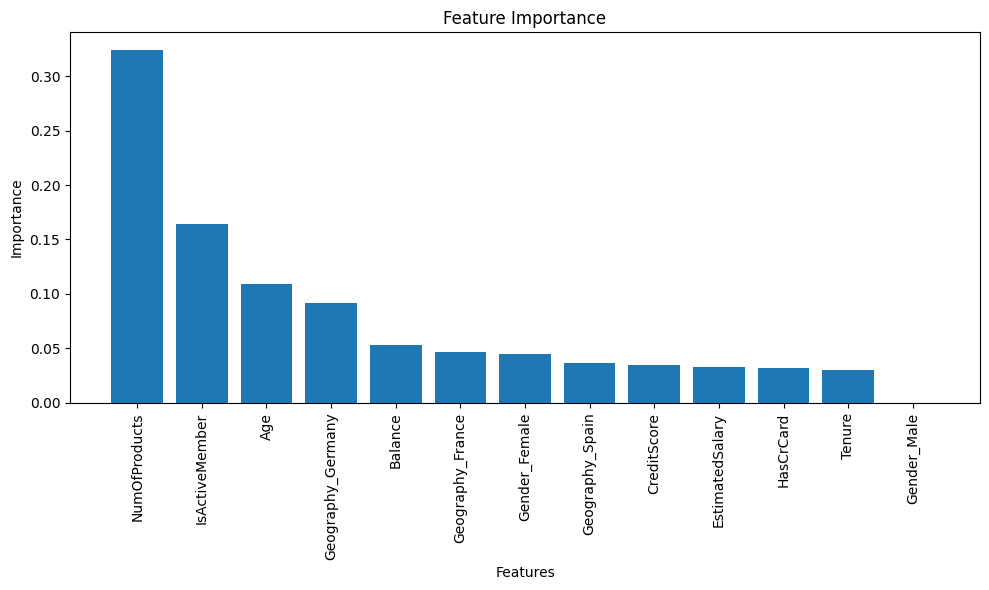

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(feature_importances_df["feature"], feature_importances_df["importance"])
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

Improve model accuracy:
1. Feature Engineering: extract more features from the raw data
2. SMOTE (Synthetic minority oversampling technique): creating new synthetic data for the minority class in the dataset -> balance the dataset
3. Ensembling: combining of multiple machine learning models together to create a new model

In [ ]:
X_new_train, X_new_test, Y_new_train, Y_new_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
X_new_train.shape

(5106, 15)

In [ ]:
print(type(X_new_train), type(X_new_test), type(Y_new_train), type(Y_new_test))


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [ ]:
# Scale the features because some numbers are very large -> skew the model -> normalize the range -> reduce bias
X_new_train = scaler.fit_transform(X_new_train)
X_new_test = scaler.fit_transform(X_new_test)

In [ ]:
print(type(X_new_train), type(X_new_test), type(Y_new_train), type(Y_new_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [ ]:
xgboost_model = xgb.XGBClassifier(random_state=42)
evaluate_and_save_model(xgboost_model, X_train, X_test, Y_train, Y_test, "xgboost_featureEngineermodel.pkl")

Accuracy: 0.7550
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1607
           1       0.41      0.56      0.47       393

    accuracy                           0.76      2000
   macro avg       0.65      0.68      0.66      2000
weighted avg       0.79      0.76      0.77      2000

-----------------
Model saved as xgboost_featureEngineermodel.pkl


In [ ]:
# xgb_new_model = xgb.XGBClassifier(random_state=42)
# evaluate_and_save_model(xgb_new_model, X_new_train, X_new_test, Y_new_train, Y_new_test, "xgb_new_model.pkl")

# dt_new_model = DecisionTreeClassifier(random_state=42)
# evaluate_and_save_model(dt_new_model, X_new_train, X_new_test, Y_new_train, Y_new_test, "dt_new_model.pkl")

rf_new_model = RandomForestClassifier(random_state=42)
evaluate_and_save_model(rf_new_model, X_new_train, X_new_test, Y_new_train, Y_new_test, "rf_new_model.pkl")

# gb_new_model = GaussianNB()
# evaluate_and_save_model(gb_new_model, X_new_train, X_new_test, Y_new_train, Y_new_test, "gb_new_model.pkl")

# knn_new_model = KNeighborsClassifier()
# evaluate_and_save_model(knn_new_model, X_new_train, X_new_test, Y_new_train, Y_new_test, "knn_new_model.pkl")

# svm_new_model = SVC(random_state=42)
# evaluate_and_save_model(svm_new_model, X_new_train, X_new_test, Y_new_train, Y_new_test, "svm_new_model.pkl")

Accuracy: 0.8560
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.96      0.91      1607
           1       0.72      0.44      0.55       393

    accuracy                           0.86      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.84      0.86      0.84      2000

-----------------
Model saved as rf_new_model.pkl


In [ ]:
# from imblearn.over_sampling import SMOTE

In [ ]:
# smote = SMOTE(random_state=42)
# X_resampled, Y_resampled = smote.fit_resample(X_train, Y_train)
# evaluate_and_save_model(xgb_new_model, X_resampled, X_new_test, Y_resampled, Y_new_test, "xgboost_SMOTE.pkl")
# evaluate_and_save_model(dt_new_model, X_resampled, X_new_test, Y_resampled, Y_new_test, "dt_new_model.pkl")
# evaluate_and_save_model(rf_new_model, X_resampled, X_test, Y_resampled, Y_test, "rf_new_model.pkl")
# evaluate_and_save_model(gb_new_model, X_resampled, X_new_test, Y_resampled, Y_new_test, "gb_new_model.pkl")
# evaluate_and_save_model(knn_new_model, X_resampled, X_new_test, Y_resampled, Y_new_test, "knn_new_model.pkl")
# evaluate_and_save_model(svm_new_model, X_resampled, X_new_test, Y_resampled, Y_new_test, "svm_new_model.pkl")

Accuracy: 0.5320
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.44      0.60      1607
           1       0.28      0.90      0.43       393

    accuracy                           0.53      2000
   macro avg       0.61      0.67      0.52      2000
weighted avg       0.82      0.53      0.57      2000

-----------------
Model saved as rf_new_model.pkl


In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, Y_resampled = ros.fit_resample(X_train, Y_train)
evaluate_and_save_model(rf_new_model, X_resampled, X_test, Y_resampled, Y_test, "rf_new_model.pkl")

Accuracy: 0.8585
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1607
           1       0.71      0.48      0.57       393

    accuracy                           0.86      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.85      0.86      0.85      2000

-----------------
Model saved as rf_new_model.pkl


In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
voting_clf = VotingClassifier(
    estimators=[('xgb', xgb.XGBClassifier(random_state=42)),
     ("rf", RandomForestClassifier(random_state=42)),
      ("svm", SVC(probability=True, random_state=42))],
    voting="soft"
)
# soft: the voting classifier will weight the predictions of the individual models by their accuracy
# hard: the voting classifier will simply take the majority vote of the individual models.

In [ ]:
evaluate_and_save_model(voting_clf, X_new_train, X_new_test, Y_new_train, Y_new_test, "voting_classifier.pkl")

Accuracy: 0.8570
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.72      0.44      0.55       393

    accuracy                           0.86      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000

-----------------
Model saved as voting_classifier.pkl


In [ ]:
evaluate_and_save_model(voting_clf1, X_train, X_test, Y_train, Y_test, "voting_classifier1.pkl")

Accuracy: 0.8535
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1607
           1       0.68      0.49      0.57       393

    accuracy                           0.85      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000

-----------------
Model saved as voting_classifier1.pkl


In [ ]:
# Focus on recall, improve accuracy

In [ ]:
voting_clf1 = VotingClassifier(
    estimators=[("rf", RandomForestClassifier(random_state=42)),
                ("xgb", xgb.XGBClassifier(random_state=42)),
                ("gb", GaussianNB()),
                ("knn", KNeighborsClassifier()),
      ("svm", SVC(probability=True, random_state=42))],
    voting="soft"
)
# soft: the voting classifier will weight the predictions of the individual models by their accuracy
# hard: the voting classifier will simply take the majority vote of the individual models.

In [ ]:
evaluate_and_save_model(voting_clf1, X_new_train, X_new_test, Y_new_train, Y_new_test, "voting_classifier1.pkl")

Accuracy: 0.8515
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1607
           1       0.68      0.46      0.55       393

    accuracy                           0.85      2000
   macro avg       0.78      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000

-----------------
Model saved as voting_classifier1.pkl
